In [6]:
import skrf as rf
import vectorfit
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
###############################################
# Select the source Touchstone parameters
filename = "/scratch/cluster/vgorti/UTAFSDataNew/new_data/case09/case09.s4p"

###############################################
# Create a fitter instance to fill get vector fit
# models of this Touchstone file
fitter = vectorfit.VectorFitter(filename)

In [8]:
###############################################
# Define a few frequency samples

# Start by getting the full sweep range
full_sweep = fitter.ground_truth.f
fmin = min(full_sweep)
fmax = max(full_sweep)

# Uniform samples
f10 = np.linspace(fmin, fmax, 10)
f20 = np.linspace(fmin, fmax, 20)
f100 = np.linspace(fmin, fmax, 100)

print(f10)

[1.00000000e+01 2.22222223e+09 4.44444445e+09 6.66666667e+09
 8.88888889e+09 1.11111111e+10 1.33333333e+10 1.55555556e+10
 1.77777778e+10 2.00000000e+10]


Performing fit with 1 poles.
  Fitting took 0.030186724849045277 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
Performing fit with 2 poles.
  Fitting took 0.019234055653214455 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 3 poles better than 2 (err 0.11551463319907729 vs 0.24194827337801542)
Fit completed in 0.16764593124389648, using 2, resulting in a fit with 3 and error=0.11551463319907729 vs samples and error=3.624055691742744 vs ground truth.
Performing fit with 1 poles.


/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Replacing d_res solution as it was too small. This is not a good sign and probably means that more starting poles are required
  vf.vector_fit(n_poles_cmplx=n_poles)
/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: UserWarning: The fitted network is passive, but the vector fit is not passive. Consider running `passivity_enforce()` to enforce passivity before using this model.
  vf.vector_fit(n_poles_cmplx=n_poles)
/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly. Hint: the linear system was ill-conditioned (max. condition number = 1009112623320798.6). This often means that more poles are required.
  vf.vector_fit(n_poles_cmplx=n_poles)
/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Vector Fitting: The pole relocation process stopped after rea

  Fitting took 0.13639202155172825 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
Performing fit with 2 poles.
  Fitting took 0.11085633561015129 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 4 poles better than 2 (err 0.7220909650884335 vs 0.8486435594447957)
Performing fit with 3 poles.


/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly. Hint: the linear system was ill-conditioned (max. condition number = 1011623518916355.5). This often means that more poles are required.
  vf.vector_fit(n_poles_cmplx=n_poles)


  Fitting took 0.2548427004367113 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 5 was not subtantially better than 4 (err 0.8608240384275343 vs 0.7220909650884335)
Performing fit with 4 poles.


/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly. Hint: the linear system was ill-conditioned (max. condition number = 1014033468475869.5). This often means that more poles are required.
  vf.vector_fit(n_poles_cmplx=n_poles)


  Fitting took 0.21372912544757128 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 6 was not subtantially better than 4 (err 0.9773555791238013 vs 0.7220909650884335)
Performing fit with 5 poles.


/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly. Hint: the linear system was ill-conditioned (max. condition number = 1023396038056617.9). This often means that more poles are required.
  vf.vector_fit(n_poles_cmplx=n_poles)


  Fitting took 0.25410305988043547 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 7 was not subtantially better than 4 (err 0.9813700888589718 vs 0.7220909650884335)
Fit completed in 1.3313770294189453, using 5, resulting in a fit with 4 and error=0.7220909650884335 vs samples and error=10.178697570680423 vs ground truth.
Performing fit with 1 poles.
  Fitting took 0.07044410239905119 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
Performing fit with 2 poles.


/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly. Hint: the linear system was ill-conditioned (max. condition number = 170822893696604.56). This often means that more poles are required.
  vf.vector_fit(n_poles_cmplx=n_poles)


  Fitting took 0.14276130311191082 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 3 was not subtantially better than 2 (err 1.4595219545361569 vs 1.273129652617016)
Performing fit with 3 poles.
  Fitting took 0.18743169773370028 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 4 poles better than 2 (err 1.1980575393229977 vs 1.273129652617016)
Performing fit with 4 poles.
  Fitting took 0.17704853415489197 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 5 was not subtantially better than 4 (err 1.2234518360838478 vs 1.1980575393229977)
Performing fit with 5 poles.
  Fitting took 0.2638124953955412 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 6 was not subtantially better than 4 (err 1.2742823613147372 vs 1.1980575393229977)
Performing fit with 6 poles.


/u/vgorti/CurveFitting-DIP/VF/vectorfit.py:227: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly. Hint: the linear system was ill-conditioned (max. condition number = 171480995467427.25). This often means that more poles are required.
  vf.vector_fit(n_poles_cmplx=n_poles)


  Fitting took 0.29306917916983366 seconds.
  Filling sampled network.
  Filling full sweep network.
  Computing error.
  Fit with 7 was not subtantially better than 4 (err 1.349528020101648 vs 1.1980575393229977)
Fit completed in 1.5066425800323486, using 6, resulting in a fit with 4 and error=1.1980575393229977 vs samples and error=1.2020301925660564 vs ground truth.


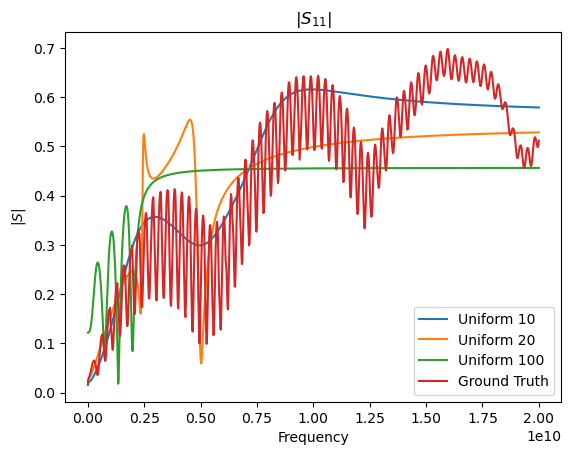

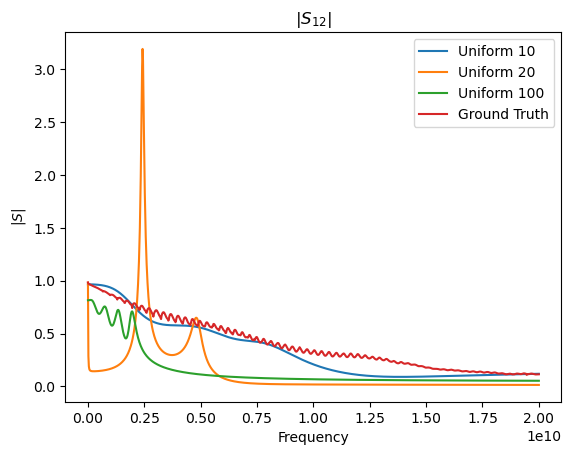

In [9]:
###############################################
# Create vector fits using the specified frequency points
vf10 = fitter.vector_fit("Uniform 10", f10)
vf20 = fitter.vector_fit("Uniform 20", f20)
vf100 = fitter.vector_fit("Uniform 100", f100)

###############################################
# Plot these fits
def plot_parameter(vector_fits, ground_truth, row, col):
    plt.figure()
    names = [vf.name for vf in vector_fits] + ["Ground Truth"]
    networks = [vf.fitted_network for vf in vector_fits] +  [ground_truth]
    
    for network in networks:
        frequencies = network.f
        s = [network.s[ff, row, col] for ff in range(len(frequencies))]
        plt.plot(frequencies, [abs(val) for val in s])
    plt.title(f"$|S_{{{row+1}{col+1}}}|$")
    plt.xlabel("Frequency")
    plt.ylabel("$|S|$")
    plt.legend(names)
plot_parameter([vf10, vf20, vf100], fitter.ground_truth, 0, 0)
plot_parameter([vf10, vf20, vf100], fitter.ground_truth, 0, 1)
plt.show()

In [10]:
vf10.fitted_network.s.shape

(1000, 4, 4)